## Lesson-06 Recurrent Neural Networks 循环神经网络的原理及应用

循环神经网络是我们常用的一个网络模型，这个网络能够处理例如字符串，时间序列等问题。因为模型对序列问题的优势，RNN模型已经成为了自然语言处理问题的常见方法。

在本课程的作业中，我们将完成三个任务：

0. 基于任务驱动，实际感受并能够初步使用pytorch；
1. 使用RNN模型进行名字的国籍分类；(这个程序主要是参考的Pytorch文档)

RNN也可以用于金融数据的预测，例如:
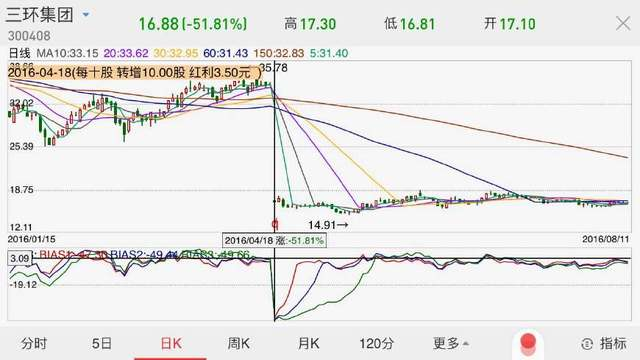

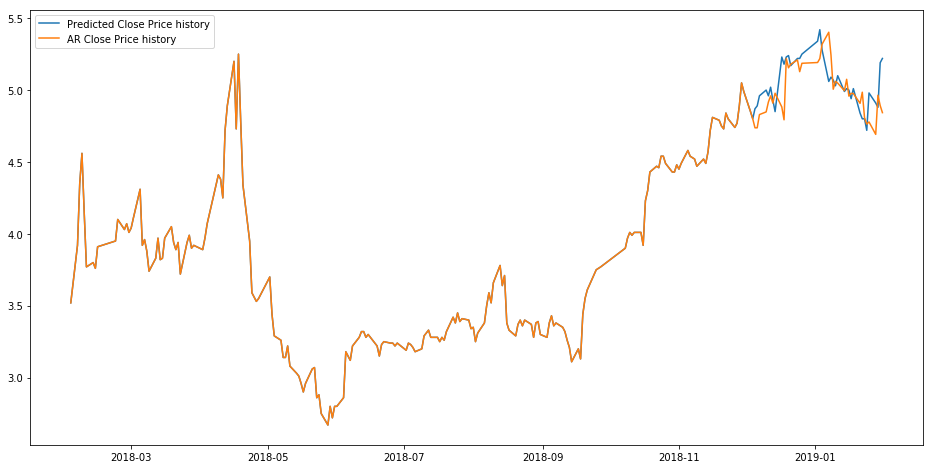

上图中蓝色的部分就是预测值， 关于RNN模型对金融数据的预测，我们只会会增加专门的研讨课程，给大家讲解

我们今天带给大家的是使用RNN进行名字的国籍分类:

## 1. 使用RNN模型进行名字的国籍分类

首先，我们下载数据: 将这个数据置于和我们jupyter notebook位置相同的地方

#### 1.1 我们利用通配符，打印出所有的文件

In [1]:
from io import open
import glob
import os
import matplotlib.pyplot as plt


def find_files(path): return glob.glob(path)

print(find_files('data/names/*.txt'))

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']


### 1.2 名字里边包含不少非Ascii码，为了简便问题，我们将他们转化为Ascii码

In [2]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_2_Ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicode_2_Ascii('Ślusàrski'))

Slusarski


### Step1.3 然后我们建立类别和对于的名字的dictionary对应

In [3]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def read_lines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicode_2_Ascii(line) for line in lines]

for filename in find_files('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = read_lines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [4]:
category_lines['Chinese']

['Ang',
 'AuYong',
 'Bai',
 'Ban',
 'Bao',
 'Bei',
 'Bian',
 'Bui',
 'Cai',
 'Cao',
 'Cen',
 'Chai',
 'Chaim',
 'Chan',
 'Chang',
 'Chao',
 'Che',
 'Chen',
 'Cheng',
 'Cheung',
 'Chew',
 'Chieu',
 'Chin',
 'Chong',
 'Chou',
 'Chu',
 'Cui',
 'Dai',
 'Deng',
 'Ding',
 'Dong',
 'Dou',
 'Duan',
 'Eng',
 'Fan',
 'Fei',
 'Feng',
 'Foong',
 'Fung',
 'Gan',
 'Gauk',
 'Geng',
 'Gim',
 'Gok',
 'Gong',
 'Guan',
 'Guang',
 'Guo',
 'Gwock',
 'Han',
 'Hang',
 'Hao',
 'Hew',
 'Hiu',
 'Hong',
 'Hor',
 'Hsiao',
 'Hua',
 'Huan',
 'Huang',
 'Hui',
 'Huie',
 'Huo',
 'Jia',
 'Jiang',
 'Jin',
 'Jing',
 'Joe',
 'Kang',
 'Kau',
 'Khoo',
 'Khu',
 'Kong',
 'Koo',
 'Kwan',
 'Kwei',
 'Kwong',
 'Lai',
 'Lam',
 'Lang',
 'Lau',
 'Law',
 'Lew',
 'Lian',
 'Liao',
 'Lim',
 'Lin',
 'Ling',
 'Liu',
 'Loh',
 'Long',
 'Loong',
 'Luo',
 'Mah',
 'Mai',
 'Mak',
 'Mao',
 'Mar',
 'Mei',
 'Meng',
 'Miao',
 'Min',
 'Ming',
 'Moy',
 'Mui',
 'Nie',
 'Niu',
 'OuYang',
 'OwYang',
 'Pan',
 'Pang',
 'Pei',
 'Peng',
 'Ping',
 'Qian',
 '

In [5]:
n_categories

18

### 1.4 这一次我们使用pytorch, 来进行向量化

In [6]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letter_to_index(letter)] = 1
    return tensor

print(letter_to_index('J'))

print(line_to_tensor('Jones').size())

35
torch.Size([5, 1, 57])


In [51]:
line_to_tensor('Jones')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

我们可以看到，是对名字里的每个字符做了 one-hot操作

### 1.5 然后，我们构建一个这样的RNN网络

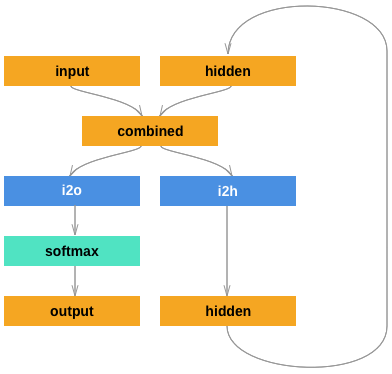

In [8]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128

In [9]:
rnn = RNN(n_letters, n_hidden, n_categories)

### 1.6 运行一步RNN

为了运行这个rnn网络，我们需要给他一个input，然后再加上一个hidden state. 然后我们就能过获得一个output，这个output便是的是这个单词的属于每个国家的概率，和接下来的hidden state.

In [10]:
input = letter_to_tensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [11]:
output

tensor([[-2.8678, -2.8897, -2.9657, -2.8235, -2.8802, -2.8665, -2.9545, -2.8996,
         -2.9056, -2.8119, -2.8267, -2.8817, -2.9476, -2.8480, -2.8977, -2.9423,
         -2.9230, -2.9126]], grad_fn=<LogSoftmaxBackward>)

In [12]:
next_hidden

tensor([[-0.0946,  0.0313, -0.1243, -0.0311,  0.0056, -0.0725,  0.0094,  0.0746,
         -0.0225, -0.0640, -0.0937,  0.0929,  0.0206,  0.1003, -0.0167,  0.0243,
          0.0965, -0.0088, -0.0777, -0.0026,  0.0482,  0.0481,  0.0395, -0.0710,
         -0.0938,  0.0667, -0.0185, -0.0329,  0.0384, -0.0465,  0.0114, -0.0194,
         -0.1348,  0.0043, -0.0085,  0.0315, -0.0469, -0.0726, -0.0366, -0.0043,
         -0.0463, -0.0846,  0.0013, -0.0180, -0.0374, -0.0137,  0.0373,  0.0038,
         -0.1204,  0.0114,  0.0699, -0.0504,  0.0264,  0.0404, -0.0990,  0.0612,
          0.0841, -0.0806,  0.0788, -0.1222,  0.1139, -0.0284,  0.0463, -0.0451,
         -0.0675,  0.0243,  0.0464, -0.0262,  0.0786,  0.0297,  0.0334,  0.0346,
          0.0518,  0.0386, -0.0647,  0.0948, -0.0056,  0.1265,  0.0060,  0.1172,
         -0.1026, -0.0607, -0.0578,  0.0041,  0.0735,  0.0457, -0.0371, -0.1016,
          0.0249,  0.0142, -0.0184,  0.0108,  0.0303, -0.0079,  0.0581, -0.0083,
          0.0056,  0.0042,  

然后，我们可以使用 line_to_tensor, 把一句话直接变成 tensor

In [13]:
input = line_to_tensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8678, -2.8897, -2.9657, -2.8235, -2.8802, -2.8665, -2.9545, -2.8996,
         -2.9056, -2.8119, -2.8267, -2.8817, -2.9476, -2.8480, -2.8977, -2.9423,
         -2.9230, -2.9126]], grad_fn=<LogSoftmaxBackward>)


这个output，就是基于目前的RNN参数，预测出来的国籍概率分布。显然是不对的，因为里边的参数都是随机的。

### 1.7 更好的观察结果

为了能够更好的看到我们的训练结果，我们需要把输出的tensor变成我们能看懂的国籍

In [16]:
def category_from_output(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

对于刚刚产生的output，我们使用这个函数

In [17]:
print(category_from_output(output))

('English', 9)


### 1.8 随机生成训练数据

In [18]:
import random

def sample(l):
    return l[random.randint(0, len(l) - 1)]

def sample_trainning():
    category = sample(all_categories)
    line = sample(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = sample_trainning()
    print('category =', category, '/ line =', line)

category = Polish / line = Sokolof
category = Italian / line = Necchi
category = Scottish / line = Williamson
category = English / line = Speight
category = Portuguese / line = De santigo
category = Russian / line = Baitalsky
category = Portuguese / line = Alves
category = Dutch / line = Laren
category = Greek / line = Stamatelos
category = Dutch / line = Rooiakker


### 因为我们这个模型需要 softmax 来获得每个类别，所以我们使用cross-entropy作为Loss函数

In [19]:
criterion = nn.CrossEntropyLoss()

In [20]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [22]:
import time
import math

n_iters = 50000 # 这个数字你可以调大一些
print_every = 5000
plot_every = 1000


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 10% (0m 7s) 2.5796 Viteri / Italian ✗ (Spanish)
10000 20% (0m 14s) 2.0960 Rosario / Russian ✗ (Portuguese)
15000 30% (0m 21s) 2.0674 Herschel / Dutch ✗ (German)
20000 40% (0m 29s) 2.5482 Romilly / Irish ✗ (French)
25000 50% (0m 36s) 3.0447 Kava / Japanese ✗ (Polish)
30000 60% (0m 45s) 0.9464 Tao / Vietnamese ✗ (Chinese)
35000 70% (0m 53s) 0.5070 Shan / Chinese ✓
40000 80% (1m 2s) 0.5212 Kamachi / Japanese ✓
45000 90% (1m 11s) 1.9836 Close / French ✗ (Greek)
50000 100% (1m 20s) 1.9838 Redin / Irish ✗ (English)


### 1.9 观察Loss的变化

In [23]:
all_losses

[2.521057027935982,
 2.37711621427536,
 2.3259400590062143,
 2.2881043522059916,
 2.1839360512644053,
 2.1552275373190644,
 2.0892149266153575,
 2.0255857946313918,
 2.0158226303197444,
 2.0291305676698683,
 1.9914981070309878,
 1.926701867863536,
 1.9194044046550989,
 1.8735539737977087,
 1.8563657900849357,
 1.8136718886084855,
 1.8928821238875388,
 1.7932459054058418,
 1.7956433780500665,
 1.7409029469694943,
 1.7780522773433476,
 1.7536699778959155,
 1.7426540914643556,
 1.7416767435842193,
 1.6800094685312361,
 1.6906013532942161,
 1.6485809542974457,
 1.6591232196204364,
 1.6305699221007526,
 1.6573294996330514,
 1.6255864255912602,
 1.6584961340222508,
 1.5775498635848053,
 1.550341190988198,
 1.5542586392341182,
 1.540964904481545,
 1.550232501640916,
 1.5006038105003536,
 1.5959506642420311,
 1.546223902479047,
 1.4925902117046062,
 1.4484513158723713,
 1.459004371711053,
 1.4840987008863011,
 1.4874134522938403,
 1.4991852572978468,
 1.4302824220754846,
 1.430427335770568,
 1

In [21]:
%matplotlib inline

In [22]:
#plt.plot(all_losses)

In [24]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

In [25]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.45) Russian
(-1.49) Czech
(-3.23) English

> Jackson
(-0.12) Scottish
(-3.01) English
(-3.93) Dutch

> Satoshi
(-1.37) Italian
(-1.48) Polish
(-1.86) Japanese


## 代码练习

### 1. 尝试在我们的RNN模型中添加更多layers，然后观察Loss变化

In [43]:
class new_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(new_RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Sequential(
                nn.Linear(input_size + hidden_size, int(input_size/2) + hidden_size),
                nn.Linear(int(input_size/2 + hidden_size), hidden_size)
                                )
        
        self.i2o = nn.Sequential(
                nn.Linear(input_size + hidden_size, int(input_size/2 + hidden_size/2 + output_size/2)),
                nn.Linear(int(input_size/2 + hidden_size/2 + output_size/2), output_size)
                                )
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        combined = torch.cat((input, hidden), 1)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128

In [44]:
new_rnn = new_RNN(n_letters, n_hidden, n_categories)

In [41]:
def new_train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    new_rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = new_rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in new_rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [45]:
learning_rate = 0.005
n_iters = 100000
print_every = 10000
plot_every = 5000


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    if iter > 80000:
        learning_rate = 0.001
    
    output, loss = new_train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

10000 10% (0m 26s) 2.5283 Wojda / Japanese ✗ (Polish)
20000 20% (0m 53s) 0.0684 Muzarev / Russian ✓
30000 30% (1m 21s) 0.6078 Pappayiorgas / Greek ✓
40000 40% (1m 47s) 2.0588 Black / Czech ✗ (Scottish)
50000 50% (2m 15s) 1.6951 Campos / Greek ✗ (Portuguese)
60000 60% (2m 43s) 0.1387 Komatsuzaki / Japanese ✓
70000 70% (3m 13s) 0.3032 Paschalis / Greek ✓
80000 80% (3m 43s) 0.6955 Phung / Vietnamese ✓
90000 90% (4m 12s) 0.4846 Gwozdek / Polish ✓
100000 100% (4m 41s) 2.1823 Cote / Scottish ✗ (French)


### 2. 将原始的RNN模型改成nn.LSTM和nn.GRU， 并且改变 `n_iters = 1000 ` 这个值，观察其变化

In [47]:
from torch import optim

In [93]:
class LSTM_model(nn.Module):
    def __init__(self):
        super(LSTM_model, self).__init__()
        self.rnn = nn.LSTM(n_letters, n_hidden, 1)
        self.linear = nn.Linear(n_hidden, n_categories)
        
    def forward(self, x):
        output, _ = self.rnn(x)
        outputs = self.linear(output[-1, ...])
        
        return outputs

In [94]:
model = LSTM_model()

In [95]:
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [96]:
def LSTM_train(category_tensor, line_tensor):
    output = model(line_tensor)

    loss = criterion(output, category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

In [97]:
n_iters = 50000
print_every = 5000
plot_every = 2500


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    
    output, loss = LSTM_train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 10% (0m 13s) 0.0165 Kowalski / Polish ✓
10000 20% (0m 28s) 3.6046 Swango / Japanese ✗ (German)
15000 30% (0m 43s) 0.0008 Mansour / Arabic ✓
20000 40% (0m 58s) 0.0035 Estevez / Spanish ✓
25000 50% (1m 14s) 2.5921 Shima / Japanese ✗ (Czech)
30000 60% (1m 30s) 0.0030 Mccallum / Scottish ✓
35000 70% (1m 46s) 0.0050 Murray / Scottish ✓
40000 80% (2m 1s) 0.2044 Castro / Portuguese ✓
45000 90% (2m 17s) 0.0074 Sugisata / Japanese ✓
50000 100% (2m 33s) 0.8158 Tahan / Irish ✗ (Arabic)


In [98]:
def evaluate(line_tensor):
    output = model(line_tensor)
    output = nn.functional.softmax(output, 1)
    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

In [99]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(0.64) Russian
(0.36) Czech
(0.00) Polish

> Jackson
(0.97) Scottish
(0.02) English
(0.00) Czech

> Satoshi
(0.89) Japanese
(0.08) Russian
(0.01) German


### 3. 把该RNN模型变成多层RNN模型，观察Loss的变化

In [83]:
class two_layers_LSTM(nn.Module):
    def __init__(self, bidirectional):
        super(two_layers_LSTM, self).__init__()
        self.bidirectional = bidirectional
        self.rnn = nn.LSTM(input_size=n_letters, hidden_size=n_hidden, num_layers=2, bidirectional=self.bidirectional)
        if self.bidirectional:
            self.linear = nn.Linear(n_hidden*4, n_categories)
        else:
            self.linear = nn.Linear(n_hidden*2, n_categories)
        
    def forward(self, x):
        output, _ = self.rnn(x)
        output_cat = torch.cat([output[0, ...], output[-1, ...]], dim=1)
        outputs = self.linear(output_cat)
        
        return outputs

In [84]:
two_layers_model = two_layers_LSTM(bidirectional=True)

In [85]:
optimizer = optim.Adam(two_layers_model.parameters(), lr=0.005)

In [86]:
def two_layers_LSTM_train(category_tensor, line_tensor):
    output = two_layers_model(line_tensor)

    loss = criterion(output, category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

In [87]:
n_iters = 20000
print_every = 2000
plot_every = 1000


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    
    output, loss = two_layers_LSTM_train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

2000 10% (0m 20s) 2.1270 Nunes / Portuguese ✓
4000 20% (0m 43s) 2.3262 Pokorny / French ✗ (Polish)
6000 30% (1m 6s) 0.1852 Ukiyo / Japanese ✓
8000 40% (1m 30s) 2.2672 Mcdonald / Scottish ✗ (English)
10000 50% (1m 53s) 0.1307 Velichansky / Russian ✓
12000 60% (2m 16s) 0.0123 Lieu / Vietnamese ✓
14000 70% (2m 40s) 0.2420 Yamaha / Japanese ✓
16000 80% (3m 4s) 0.0846 Uberti / Italian ✓
18000 90% (3m 27s) 0.0807 Faolan / Irish ✓
20000 100% (3m 51s) 0.0448 Edley / English ✓


In [100]:
def evaluate(line_tensor):
    output = two_layers_model(line_tensor)
    output = nn.functional.softmax(output, 1)
    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

In [101]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(0.94) Russian
(0.05) Czech
(0.00) English

> Jackson
(0.87) Scottish
(0.12) English
(0.00) Russian

> Satoshi
(1.00) Japanese
(0.00) Polish
(0.00) Czech


### 4. Pytorch里边常用nn.NLLoss来代替crossentropy，将criterion改为nn.NLLoss，观察变化

In [107]:
class two_layers_LSTM(nn.Module):
    def __init__(self, bidirectional):
        super(two_layers_LSTM, self).__init__()
        self.bidirectional = bidirectional
        self.rnn = nn.LSTM(input_size=n_letters, hidden_size=n_hidden, num_layers=2, bidirectional=self.bidirectional)
        if self.bidirectional:
            self.linear = nn.Linear(n_hidden*4, n_categories)
        else:
            self.linear = nn.Linear(n_hidden*2, n_categories)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        output, _ = self.rnn(x)
        output_cat = torch.cat([output[0, ...], output[-1, ...]], dim=1)
        outputs = self.linear(output_cat)
        outputs = self.softmax(outputs)
        
        return outputs

In [102]:
criterion = nn.NLLLoss()

In [103]:
def two_layers_LSTM_train(category_tensor, line_tensor):
    output = two_layers_model(line_tensor)

    loss = criterion(output, category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

In [108]:
two_layers_model = two_layers_LSTM(bidirectional=True)

In [109]:
optimizer = optim.Adam(two_layers_model.parameters(), lr=0.005)

In [110]:
n_iters = 20000
print_every = 2000
plot_every = 1000


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    
    output, loss = two_layers_LSTM_train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

2000 10% (0m 20s) 3.4827 Auttenberg / English ✗ (Polish)
4000 20% (0m 42s) 2.4362 Vargas / Greek ✗ (Portuguese)
6000 30% (1m 5s) 3.1716 Groos / Greek ✗ (German)
8000 40% (1m 28s) 0.4633 Vuong / Vietnamese ✓
10000 50% (1m 51s) 1.7771 Norville / Italian ✗ (English)
12000 60% (2m 14s) 2.6242 Courtemanche / Dutch ✗ (French)
14000 70% (2m 37s) 0.0000 Rakhmaninov / Russian ✓
16000 80% (3m 0s) 2.1311 Comino / Italian ✗ (Greek)
18000 90% (3m 23s) 1.0056 Maier / German ✓
20000 100% (3m 46s) 1.3518 Scott / Scottish ✗ (English)


In [111]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(0.52) Russian
(0.15) Czech
(0.13) Polish

> Jackson
(0.89) Scottish
(0.10) English
(0.00) Czech

> Satoshi
(0.77) Japanese
(0.13) Arabic
(0.07) Italian


## 老师您好，感谢您的认真批改。这几次训练的loss都不稳定，请问是lr与iteration设置的问题还是网络设置的问题呢？